In [ ]:
!unzip fruits-360.zip -d /content/fruits360

Streaming output truncated to the last 5000 lines.
  inflating: /content/fruits360/fruits-360/Training/Tomato Cherry Red 1/83_100.jpg  
  inflating: /content/fruits360/fruits-360/Training/Tomato Cherry Red 1/84_100.jpg  
  inflating: /content/fruits360/fruits-360/Training/Tomato Cherry Red 1/85_100.jpg  
  inflating: /content/fruits360/fruits-360/Training/Tomato Cherry Red 1/86_100.jpg  
  inflating: /content/fruits360/fruits-360/Training/Tomato Cherry Red 1/87_100.jpg  
  inflating: /content/fruits360/fruits-360/Training/Tomato Cherry Red 1/88_100.jpg  
  inflating: /content/fruits360/fruits-360/Training/Tomato Cherry Red 1/89_100.jpg  
  inflating: /content/fruits360/fruits-360/Training/Tomato Cherry Red 1/8_100.jpg  
  inflating: /content/fruits360/fruits-360/Training/Tomato Cherry Red 1/90_100.jpg  
  inflating: /content/fruits360/fruits-360/Training/Tomato Cherry Red 1/91_100.jpg  
  inflating: /content/fruits360/fruits-360/Training/Tomato Cherry Red 1/92_100.jpg  
  inflating: /c

In [ ]:
from pathlib import Path

DATA_DIR = Path("/content/fruits360/fruits-360")
TRAIN_DIR = DATA_DIR / "Training"
TEST_DIR  = DATA_DIR / "Test"

print("Train folder:", TRAIN_DIR.exists())
print("Test folder:", TEST_DIR.exists())


Train folder: True
Test folder: True


In [ ]:
# ============================================================
# IMPORTS
# ============================================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

import os
from pathlib import Path


In [ ]:
IMG_SIZE = (100, 100)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.1   # 10% validation
)

test_datagen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

num_classes = train_generator.num_classes
print("Detected number of classes:", num_classes)


Found 108028 images belonging to 228 classes.
Found 11922 images belonging to 228 classes.
Found 39999 images belonging to 228 classes.
Detected number of classes: 228


In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 2
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 3
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 4
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully-connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(num_classes, activation='softmax'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 228)            │        58,596 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,808,484 (10.71 MB)

 Trainable params: 2,807,524 (10.71 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
opt = Adam(learning_rate=0.001)

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 418s 121ms/step - accuracy: 0.0405 - loss: 4.9859 - val_accuracy: 0.3063 - val_loss: 3.1248
Epoch 2/25
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 395s 117ms/step - accuracy: 0.2238 - loss: 3.4179 - val_accuracy: 0.5283 - val_loss: 1.7712
Epoch 3/25
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 396s 117ms/step - accuracy: 0.5403 - loss: 1.7962 - val_accuracy: 0.8089 - val_loss: 0.6637
Epoch 4/25
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 395s 117ms/step - accuracy: 0.7540 - loss: 0.8750 - val_accuracy: 0.9287 - val_loss: 0.2287
Epoch 5/25
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 390s 116ms/step - accuracy: 0.8782 - loss: 0.3924 - val_accuracy: 0.9331 - val_loss: 0.2242
Epoch 6/25
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 392s 116ms/step - accuracy: 0.9287 - loss: 0.2224 - val_accuracy: 0.9716 - val_loss: 0.0877
Epoch 7/25
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 405s 120ms/step - accuracy: 0.9485 - loss: 0.1575 - val_accuracy: 0.9680 - val_loss: 0.1371
Epoch 8/25
3376/3376 ━━━━━━━━━━━━━━━━━━━━ 406s 120ms/step - ac

In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.9914 - loss: 0.0773
Test Accuracy: 0.9935998320579529


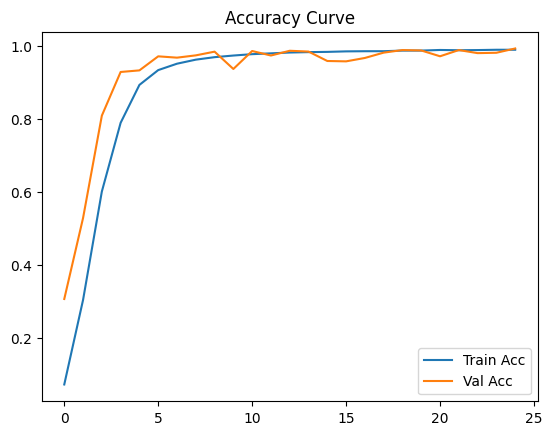

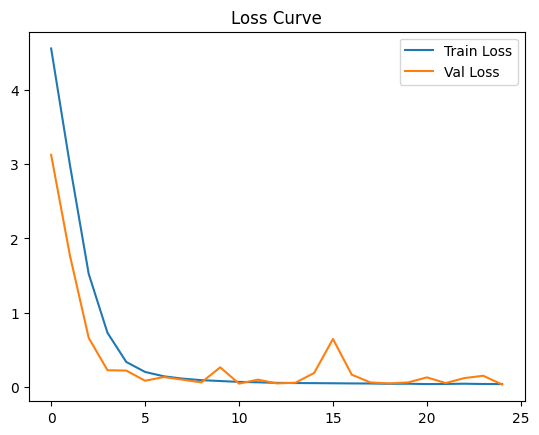

In [12]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()
